# 모델링 익히기_Regression

회귀 모델링 절차를 익혀 봅시다.

## 0.환경준비

In [2]:
#기본 라이브러리들
import numpy as np   # 수치연산
import pandas as pd  # 데이터프레임(2차원) 
import matplotlib.pyplot as plt  # 그래프
from sklearn.model_selection import train_test_split  # 데이터 분할

## 1.준비된 데이터

In [3]:
# 깃허브에 올려 놓은 예제 데이터를 가져와서 '데이터프레임'에 저장합니다.
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/advertising.csv'
data = pd.read_csv(path)

# 데이터프레임을 살짝 열어 봅니다.(상위 5개 행 조회)
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


* TV, Radio, Newspaper 광고비용 지출에 따른 판매액 데이터입니다.
* 광고비용을 어떻게 지출하느냐에 따라 매출액은 어떻게 달라질까요?

## 2.데이터 분할

1) 데이터를 X와 y로 나누기
> * X : features, input, 조작변수, 요인, (독립변수)
* y : target, output, 결과변수, label, (종속변수) 

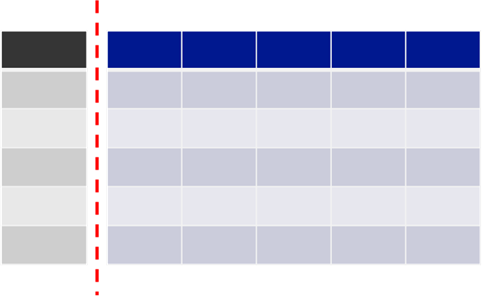

In [4]:
# 1) 먼저 x와 y로 분할
target = 'Sales'
x = data.drop(target, axis=1) # .drop( , inplace =True )
y = data.loc[:, target] # : 처음부터 끝까지

2) train, validation, test로 분할

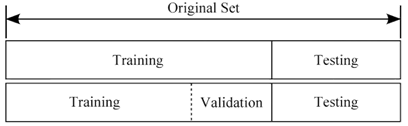


> * train : 학습용
* validation : 검증용
* test : 최종 테스트(필드 테스트, 베타 테스트 의미)

**How**
> * 비시계열 : 랜덤하게 분할
* 시계열 : 시간순으로 분할


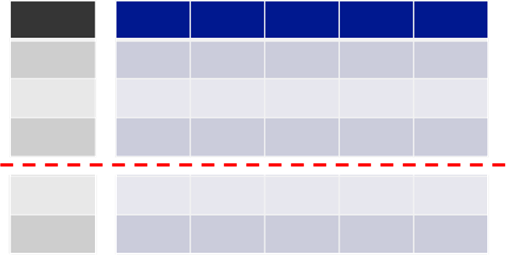

In [5]:
# 2) 전체에서 train : test = 7 : 3 으로 나눕니다. 
# x_train, x_test, y_train, y_testx_train, x_test, y_train, y_test 순서 중요
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

## 3.학습

* 필요한 함수들 불러오기

In [6]:
# 알고리즘 불러오기 : 선형회귀
from sklearn.linear_model import LinearRegression

# 회귀 모델 평가 함수 불러오기
from sklearn.metrics import mean_absolute_error #평균 오차 의미

* 모델 선언하기

In [7]:
# 모델 선언 : 알고리즘을 어떻게 사용할지 설정
model = LinearRegression() # () 뜻 : 모든 선언값을 default로 정의

* 학습

In [9]:
# 학습 : .fit   ==> 학습은 x와 y의 패턴을 찾아내는 과정입니다.
model.fit(x_train, y_train)

LinearRegression()

## 4.예측
* 학습의 결과 모델이 만들어 집니다.
* 모델이 얼마나 정확한지 검증해 봅시다.

In [10]:
pred = model.predict(x_test)

In [11]:
pred

array([16.85946065, 18.48356872,  9.88877554, 10.1752377 , 14.81276244,
       11.93064739, 15.49254208, 15.79638544, 10.69962779, 14.85477095,
       20.93251847,  7.74178528, 24.68840292, 23.08559341, 20.65897765,
       14.08525338, 16.30817679, 16.41332818,  7.12090501, 10.96003537,
       14.20375666, 13.46170737, 19.71736164,  7.58947596, 15.18864882,
       14.27242333,  9.71193366, 15.31194632, 18.63535839, 21.74593527,
        6.68070097, 12.96293633,  5.39498014, 21.44669412, 14.9733301 ,
       19.35699978, 10.60712996, 11.99522237, 19.30887556, 11.45065635,
        7.38771038, 14.89009056, 11.13838957, 12.74789693, 17.08012662,
        9.87235188, 12.07278337,  6.0671074 , 17.06011299, 15.17290847,
       23.1700602 , 18.14611922,  6.63494318, 13.81762205, 21.05210948,
       10.26605621, 10.70803393, 13.28919527,  6.65762071, 10.16559062])

## 5.평가

In [12]:
# 평균 오차
mean_absolute_error(y_test, pred)

1.2182131899436515

# 실습1 : Car Seat 수요량 예측
* 위 코드를 보면서 그대로 따라해보기
* copy & paste 보다는 보면서 따라 코딩하기를 권장합니다.

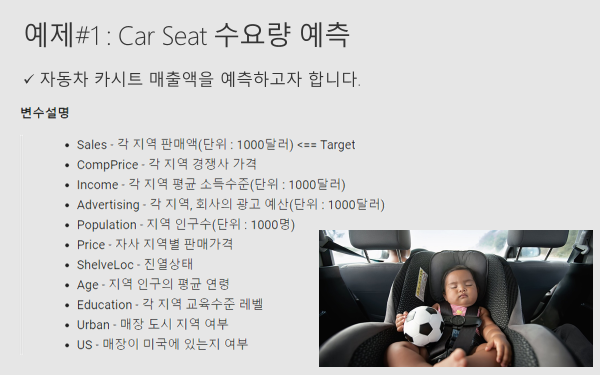

## 1.준비된 데이터

In [13]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats.csv'
use_cols = ['Sales','CompPrice','Income', 'Advertising','Population','Price','Age']
data = pd.read_csv(path, usecols = use_cols)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age
0,9.50,138,73,11,276,120,42
1,11.22,111,48,16,260,83,65
2,10.06,113,35,10,269,80,59
3,7.40,117,100,4,466,97,55
4,4.15,141,64,3,340,128,38


## 2.데이터 분할

In [14]:
# 1) 먼저 x와 y로 분할
target = 'Sales'
x = data.drop(target, axis=1)
y = data.loc[:, target]

In [15]:
# 2) 전체에서 train : test = 7 : 3 으로 나눕니다.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

## 3.학습

In [16]:
# 알고리즘 불러오기
from sklearn.linear_model import LinearRegression

# 회귀 모델 평가 함수 불러오기
from sklearn.metrics import mean_absolute_error #평균 오차 의미

In [17]:
# 모델 선언
model1 = LinearRegression()

In [18]:
# 학습 : .fit
model1.fit(x_train, y_train)

LinearRegression()

## 4.예측


In [19]:
# 예측 : .predict
pred = model1.predict(x_test)

In [20]:
pred

array([ 6.04001883,  8.03189167,  6.82969847,  6.54134802,  8.7764573 ,
        4.73580438, 10.1677201 ,  7.90597976,  3.95843599, 10.96821887,
        6.37308482,  7.81699041,  7.08815705,  5.66056603,  6.39368936,
       11.40053669,  6.88231921,  5.03927297, 11.51354621, 11.11532343,
       10.11675655,  4.60719884,  7.10206541,  3.13097722,  5.21774187,
        6.93257031,  9.25735027, 10.1518543 ,  7.42533873,  7.64007814,
        4.7954221 , 11.21671752,  8.55135247,  3.30057708,  6.12418354,
        4.97379508,  7.1574236 ,  8.01927484,  6.39230933,  6.2615667 ,
        7.13250822,  6.75714469,  4.80432847,  7.26724338,  8.80048481,
       10.98701347,  7.40301025,  9.36993373,  7.2970292 ,  9.32395628,
        8.24524192,  9.87480003,  6.04769144,  9.82237438,  6.40057497,
        2.76952509,  3.33785588, 10.37842034,  6.50320999,  9.48747384,
        7.44738621,  3.6989827 ,  8.13526811, 10.06584521,  5.89169392,
        8.47791242, 10.31862303,  8.77246296,  8.03900207,  9.81

## 5.평가

In [21]:
# 평균 오차 : mean_absolute_error(실제값, 예측값)
mean_absolute_error(y_test, pred)

1.492412940970835

# 실습2 : 보스톤 집값 예측
* 위 코드를 보면서 그대로 따라해보기
* copy & paste 보다는 보면서 따라 코딩하기를 권장합니다.

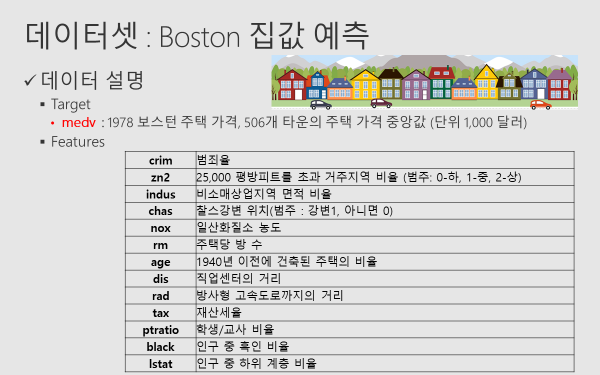

## 1.준비된 데이터

In [23]:
data_path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv'
data = pd.read_csv(data_path)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## 2.데이터 분할

In [24]:
# 1) 먼저 x와 y로 분할
target = 'medv'
x = data.drop(target, axis=1)
y = data.loc[:, target] # 행 : 타운 별 집값임

In [25]:
# 2) 전체에서 train : test = 7 : 3 으로 나눕니다.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

## 3.학습

In [26]:
# 알고리즘 불러오기
from sklearn.linear_model import LinearRegression

# 회귀 모델 평가 함수 불러오기 : 평균오차
from sklearn.metrics import mean_absolute_error

In [27]:
# 모델 선언
model2 = LinearRegression()

In [28]:
# 학습 : .fit
model2.fit(x_train, y_train)

LinearRegression()

## 4.예측


In [29]:
# 예측 : .predict
pred = model2.predict(x_test)

In [30]:
pred

array([22.714483  , 19.1768923 , 28.12268659, 32.71551777, 23.62701854,
       22.13644156, 33.41498802, 14.03313991, 20.42536131, 20.77465215,
       25.35250852, 17.83551402, 26.24193807, 18.15349667, 18.21060814,
       18.81985263, 21.54161976, 17.52436112, 19.64484841, 12.8117491 ,
       22.79437587, 20.64521161, 12.78887275, 13.16625493, 15.70567291,
       22.04861211, 16.05552725, 34.02535135, 17.7749075 , 23.8173136 ,
       18.38566879, 30.8987863 , 18.22901157, 22.28062278, 22.58914369,
       27.31524714, 30.9279527 , 31.47160785, 29.73717738, 27.31550956,
       16.65463755, 24.04422106, 37.38299129, 19.65989053, 18.69298286,
       14.10146128, 11.60621728,  4.4460854 , 15.49458859, 16.27947434,
       20.69326871, 19.48862723, 33.36083486, 19.04195843, 28.49261775,
       20.45862837, 25.43881422, 32.55695363, 24.42796485, 14.35365654,
       18.92666785, 20.6838769 , 32.87918691, 24.64533141, 31.9024896 ,
       13.67388395, 18.51736968, 25.9422241 , 40.76580016, 14.97

## 5.평가

In [31]:
# 평균 오차 : mean_absolute_error(실제값, 예측값)
mean_absolute_error(y_test,pred)

3.257696366362797